In [110]:
# Importing all the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Loading the housing dataset
housing=pd.read_csv("Data/housing.csv",usecols=["District Name","Rural/Urban","Total Number of households","Total Number of Livable","Total Number of Dilapidated","Latrine_premise"])

In [59]:
housing.head()

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3


In [60]:
housing.shape

(1908, 6)

In [61]:
housing

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...
1903,North & Middle Andaman,Total,100,44.6,2.8,48.3
1904,North & Middle Andaman,Urban,100,55.9,6.6,56.1
1905,South Andaman,Rural,100,33.5,3.5,64.7
1906,South Andaman,Total,100,26.4,2.2,78.3


In [62]:
# Loading the census dataset
census=pd.read_csv("Clean_data/census_clean.csv")

In [63]:
census.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [64]:
housing_data=housing.pivot_table(index =['District Name','Rural/Urban'] )

In [111]:
housing_data

Latrine_premise  Total Number of Dilapidated  \
District Name Rural/Urban                                                 
Adilabad      Rural                   13.8                          6.5   
              Total                   29.3                          5.5   
              Urban                   70.7                          2.8   
Agra          Rural                   16.6                          4.3   
              Total                   46.3                          3.2   
...                                    ...                          ...   
Yavatmal      Total                   31.0                          7.3   
              Urban                   68.2                          3.9   
Zunheboto     Rural                   71.7                          1.7   
              Total                   75.4                          1.5   
              Urban                   94.4                          0.2   

                           Total Number of Livable  Total Number of households  
District Name Rural/Urban                                                       
Adilabad      Rural                           35.7                         100  
              Total                           32.4                         100  
              Urban                           23.5                         100  
Agra          Rural                           52.9                         100  
              Total                           46.2                         100  
...                                            ...                         ...  
Yavatmal      Total                           43.4                         100  
              Urban                           29.3                         100  
Zunheboto     Rural                           44.2                         100  
              Total                           42.9                         100  
              Urban                           36.1                         100  

[1890 rows x 4 columns]

In [66]:
# Keeping only the usefull columns for analysis
census_data=census[["District","Households_Rural","Households_Urban","Households"]]

In [67]:
census_data

,District,Households_Rural,Households_Urban,Households
0,Kupwara,158438.0,23226.0,181664.0
1,Badgam,160649.0,27190.0,187839.0
2,Leh(Ladakh),36920.0,17474.0,54394.0
3,Kargil,40370.0,7774.0,48144.0
4,Punch,132139.0,15269.0,147408.0
...,...,...,...,...
635,Mahe,0.0,12110.0,12110.0
636,Karaikal,35618.0,33715.0,69333.0
637,Nicobars,15958.0,0.0,15958.0
638,North AND Middle Andaman,39091.0,1094.0,40185.0


In [68]:
# Merging census and housing data
data=census_data.merge(housing,how="inner",left_on="District",right_on="District Name")

In [69]:
data

,District,Households_Rural,Households_Urban,Households,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,158438.0,23226.0,181664.0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,158438.0,23226.0,181664.0,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,158438.0,23226.0,181664.0,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,160649.0,27190.0,187839.0,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,160649.0,27190.0,187839.0,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...,...,...,...,...
1925,Nicobars,15958.0,0.0,15958.0,Nicobars,Rural,100,23.8,1.2,80.9
1926,Nicobars,15958.0,0.0,15958.0,Nicobars,Total,100,23.8,1.2,80.9
1927,South Andaman,34901.0,50631.0,85532.0,South Andaman,Rural,100,33.5,3.5,64.7
1928,South Andaman,34901.0,50631.0,85532.0,South Andaman,Total,100,26.4,2.2,78.3


In [70]:
# Calculating Total Number of Dilapidated for Rural area
data.loc[data["Rural/Urban"] == "Rural", "Total Number of Dilapidated"] = (data["Households_Rural"] * data["Total Number of Dilapidated"])//100

In [71]:
data.head()

,District,Households_Rural,Households_Urban,Households,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,158438.0,23226.0,181664.0,Kupwara,Rural,100,58.1,13150.0,48.9
1,Kupwara,158438.0,23226.0,181664.0,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,158438.0,23226.0,181664.0,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,160649.0,27190.0,187839.0,Badgam,Rural,100,46.3,6265.0,83.3
4,Badgam,160649.0,27190.0,187839.0,Badgam,Total,100,44.7,3.8,84.3


In [72]:
# Calculating Total Number of Dilapidated for Urban area
data.loc[data["Rural/Urban"] == "Urban", "Total Number of Dilapidated"] = (data["Households_Urban"] * data["Total Number of Dilapidated"])//100

In [73]:
# Calculating Total Number of Dilapidated for Rural+ Urban area
data.loc[data["Rural/Urban"] == "Total", "Total Number of Dilapidated"] = (data["Households"] * data["Total Number of Dilapidated"])//100

In [74]:
# Calculating Latrine_premise for Rural+ Urban area
data.loc[data["Rural/Urban"] == "Total", "Latrine_premise"] = (data["Households"] * data["Latrine_premise"])//100

In [75]:
# Calculating Latrine_premise for Rural area
data.loc[data["Rural/Urban"] == "Rural", "Latrine_premise"] = (data["Households_Rural"] * data["Latrine_premise"])//100

In [76]:
# Calculating Latrine_premise for Urban area
data.loc[data["Rural/Urban"] == "Urban", "Latrine_premise"] = (data["Households_Urban"] * data["Latrine_premise"])//100

In [77]:
# Calculating Total Number of Livable for Rural+ Urban area
data.loc[data["Rural/Urban"] == "Total", "Total Number of Livable"] = (data["Households"] * data["Total Number of Livable"])//100

In [78]:
# Calculating Total Number of Livable for Rural area
data.loc[data["Rural/Urban"] == "Rural", "Total Number of Livable"] = (data["Households_Rural"] * data["Total Number of Livable"])//100

In [79]:
# Calculating Total Number of Livable for Urban area
data.loc[data["Rural/Urban"] == "Urban", "Total Number of Livable"] = (data["Households_Urban"] * data["Total Number of Livable"])//100

In [80]:
data.head()

,District,Households_Rural,Households_Urban,Households,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,158438.0,23226.0,181664.0,Kupwara,Rural,100,92052.0,13150.0,77476.0
1,Kupwara,158438.0,23226.0,181664.0,Kupwara,Total,100,104093.0,14351.0,92466.0
2,Kupwara,158438.0,23226.0,181664.0,Kupwara,Urban,100,11496.0,1114.0,16304.0
3,Badgam,160649.0,27190.0,187839.0,Badgam,Rural,100,74380.0,6265.0,133820.0
4,Badgam,160649.0,27190.0,187839.0,Badgam,Total,100,83964.0,7137.0,158348.0


istrict
Households_Rural
Households_Rural_Livable
Households_Rural_Dilapidated
Households_Rural_Toilet_Premise
Households_Urban
Households_Urban_Livable
Households_Urban_Dilapidated
Households_Urban_Toilet_Premise


In [81]:
# Creating a new rural dataset 
rural=data[data["Rural/Urban"]== "Rural"]

In [82]:
# Creating a new urban dataset 
urban=data[data["Rural/Urban"]== "Urban"]

In [83]:
# Renaming rural dataset columns
rural.rename(columns={"Total Number of Livable":"Households_Rural_Livable",
              "Total Number of Dilapidated":"Households_Rural_Dilapidated",
             "Latrine_premise":"Households_Rural_Toilet_Premise"},inplace=True)

C:\Users\futurense\AppData\Local\Temp\ipykernel_26416\1941793672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rural.rename(columns={"Total Number of Livable":"Households_Rural_Livable",


In [84]:
rural.head()

,District,Households_Rural,Households_Urban,Households,District Name,Rural/Urban,Total Number of households,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise
0,Kupwara,158438.0,23226.0,181664.0,Kupwara,Rural,100,92052.0,13150.0,77476.0
3,Badgam,160649.0,27190.0,187839.0,Badgam,Rural,100,74380.0,6265.0,133820.0
6,Leh(Ladakh),36920.0,17474.0,54394.0,Leh(Ladakh),Rural,100,19013.0,775.0,32526.0
9,Kargil,40370.0,7774.0,48144.0,Kargil,Rural,100,29591.0,1412.0,39078.0
12,Punch,132139.0,15269.0,147408.0,Punch,Rural,100,78622.0,3171.0,18103.0


In [85]:
# Renaming urban dataset columns
urban.rename(columns={"Total Number of Livable":"Households_Urban_Livable",
              "Total Number of Dilapidated":"Households_Urban_Dilapidated",
             "Latrine_premise":"Households_Urban_Toilet_Premise"},inplace=True)

C:\Users\futurense\AppData\Local\Temp\ipykernel_26416\4127402276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban.rename(columns={"Total Number of Livable":"Households_Urban_Livable",


In [86]:
urban.head()

,District,Households_Rural,Households_Urban,Households,District Name,Rural/Urban,Total Number of households,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
2,Kupwara,158438.0,23226.0,181664.0,Kupwara,Urban,100,11496.0,1114.0,16304.0
5,Badgam,160649.0,27190.0,187839.0,Badgam,Urban,100,9190.0,706.0,24579.0
8,Leh(Ladakh),36920.0,17474.0,54394.0,Leh(Ladakh),Urban,100,9540.0,192.0,16740.0
11,Kargil,40370.0,7774.0,48144.0,Kargil,Urban,100,5348.0,93.0,7579.0
14,Punch,132139.0,15269.0,147408.0,Punch,Urban,100,4168.0,122.0,11497.0


In [87]:
urban.drop("District",axis=1,inplace=True)

C:\Users\futurense\AppData\Local\Temp\ipykernel_26416\17523279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban.drop("District",axis=1,inplace=True)


In [88]:
urban

,Households_Rural,Households_Urban,Households,District Name,Rural/Urban,Total Number of households,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
2,158438.0,23226.0,181664.0,Kupwara,Urban,100,11496.0,1114.0,16304.0
5,160649.0,27190.0,187839.0,Badgam,Urban,100,9190.0,706.0,24579.0
8,36920.0,17474.0,54394.0,Leh(Ladakh),Urban,100,9540.0,192.0,16740.0
11,40370.0,7774.0,48144.0,Kargil,Urban,100,5348.0,93.0,7579.0
14,132139.0,15269.0,147408.0,Punch,Urban,100,4168.0,122.0,11497.0
...,...,...,...,...,...,...,...,...,...
1917,356886.0,538022.0,894908.0,Tiruppur,Urban,100,126973.0,3766.0,403516.0
1919,0.0,15519.0,15519.0,Yanam,Urban,100,2389.0,108.0,12710.0
1921,0.0,12110.0,12110.0,Mahe,Urban,100,1913.0,133.0,11843.0
1924,35618.0,33715.0,69333.0,Karaikal,Urban,100,7080.0,404.0,25083.0


In [89]:
# Reseting the index
rural = rural.reset_index(drop=True)
urban= urban.reset_index(drop=True)

In [90]:
rural.drop(["Households","District Name","Rural/Urban","Total Number of households","Households_Rural","Households_Urban"],axis=1,inplace=True)

In [91]:
# Combing both rural and urban dataset for analysis
result = pd.concat([rural, urban], axis=1)

In [92]:
result

,District,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Rural,Households_Urban,Households,District Name,Rural/Urban,Total Number of households,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,92052.0,13150.0,77476.0,158438.0,23226.0,181664.0,Kupwara,Urban,100,11496.0,1114.0,16304.0
1,Badgam,74380.0,6265.0,133820.0,160649.0,27190.0,187839.0,Badgam,Urban,100,9190.0,706.0,24579.0
2,Leh(Ladakh),19013.0,775.0,32526.0,36920.0,17474.0,54394.0,Leh(Ladakh),Urban,100,9540.0,192.0,16740.0
3,Kargil,29591.0,1412.0,39078.0,40370.0,7774.0,48144.0,Kargil,Urban,100,5348.0,93.0,7579.0
4,Punch,78622.0,3171.0,18103.0,132139.0,15269.0,147408.0,Punch,Urban,100,4168.0,122.0,11497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,NaN,NaN,NaN,NaN,356886.0,538022.0,894908.0,Tiruppur,Urban,100,126973.0,3766.0,403516.0
641,NaN,NaN,NaN,NaN,0.0,15519.0,15519.0,Yanam,Urban,100,2389.0,108.0,12710.0
642,NaN,NaN,NaN,NaN,0.0,12110.0,12110.0,Mahe,Urban,100,1913.0,133.0,11843.0
643,NaN,NaN,NaN,NaN,35618.0,33715.0,69333.0,Karaikal,Urban,100,7080.0,404.0,25083.0


In [93]:
rural.shape

(638, 4)

In [94]:
urban.shape

(645, 9)

In [95]:
# Creating a copy 
result_copy=result.copy()

In [96]:
# Droping NaN values
result_copy.dropna(inplace=True)

In [97]:
result_copy.head()

,District,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Rural,Households_Urban,Households,District Name,Rural/Urban,Total Number of households,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,92052.0,13150.0,77476.0,158438.0,23226.0,181664.0,Kupwara,Urban,100,11496.0,1114.0,16304.0
1,Badgam,74380.0,6265.0,133820.0,160649.0,27190.0,187839.0,Badgam,Urban,100,9190.0,706.0,24579.0
2,Leh(Ladakh),19013.0,775.0,32526.0,36920.0,17474.0,54394.0,Leh(Ladakh),Urban,100,9540.0,192.0,16740.0
3,Kargil,29591.0,1412.0,39078.0,40370.0,7774.0,48144.0,Kargil,Urban,100,5348.0,93.0,7579.0
4,Punch,78622.0,3171.0,18103.0,132139.0,15269.0,147408.0,Punch,Urban,100,4168.0,122.0,11497.0


In [98]:
result_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 637
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   District                         638 non-null    object 
 1   Households_Rural_Livable         638 non-null    float64
 2   Households_Rural_Dilapidated     638 non-null    float64
 3   Households_Rural_Toilet_Premise  638 non-null    float64
 4   Households_Rural                 638 non-null    float64
 5   Households_Urban                 638 non-null    float64
 6   Households                       638 non-null    float64
 7   District Name                    638 non-null    object 
 8   Rural/Urban                      638 non-null    object 
 9   Total Number of households       638 non-null    int64  
 10  Households_Urban_Livable         638 non-null    float64
 11  Households_Urban_Dilapidated     638 non-null    float64
 12  Households_Urban_Toile

In [99]:
result_copy.to_csv('Clean_data/housing_clean.csv', index=False)

## visuals

In [100]:
# Calculating toilet premise in rural + urban
a=result_copy["Households_Rural_Toilet_Premise"].sum()+result_copy["Households_Urban_Toilet_Premise"].sum()

In [101]:
# Calculating sum of households
b=result_copy["Households_Rural"].sum()+result_copy["Households_Urban"].sum()

In [102]:
b

333824044.1787821

In [103]:
a

160392868.0

In [104]:
(a/b)*100

48.04712865862362

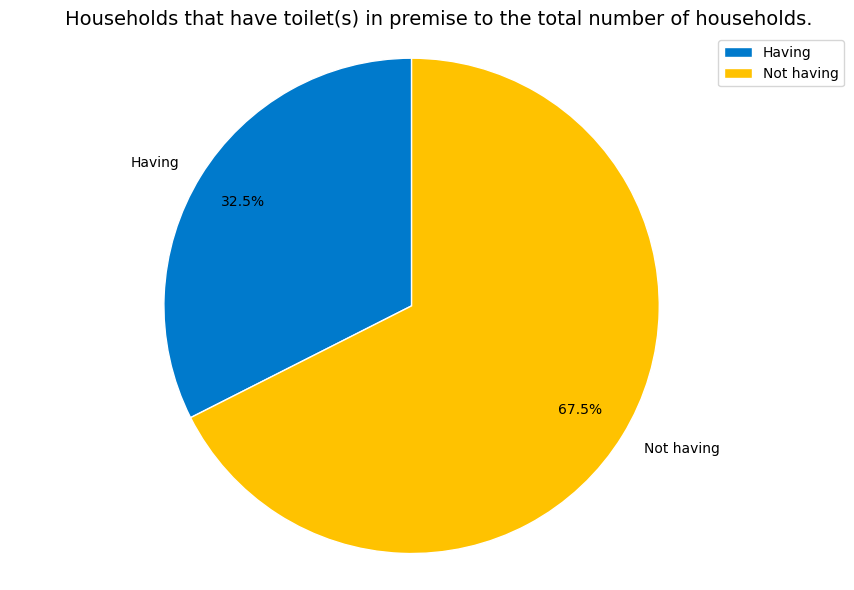

In [117]:

# Define the data
data9 = {'value': [a, b]}
chart = pd.DataFrame(data9, index=['Having', 'Not having'])

# Calculate the percentage of each value
total = chart['value'].sum()
chart['percent'] = chart['value'] / total * 100

# Define a color palette
colors = ['#007ACC', '#FFC200']

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
chart['percent'].plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.8, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Remove unnecessary chart elements
plt.axis('equal')
plt.title('         Households that have toilet(s) in premise to the total number of households.', fontsize=14)

# Add labels
plt.legend(labels=chart.index, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.ylabel('')

# Save the chart to a file
plt.savefig('toilet_pie_chart.png')

# Show the chart
plt.show()


In [106]:
df_population = result[['Households_Urban', 'Households_Rural']]

Text(0.5, 1.0, 'Comparison of Urban and Rural Populations')

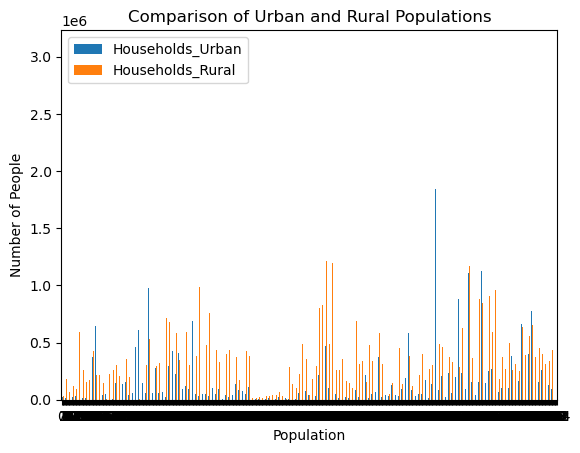

In [107]:
ax = df_population.plot.bar(rot=0)
ax.set_xlabel('Population')
ax.set_ylabel('Number of People')
ax.set_title('Comparison of Urban and Rural Populations')